In [1]:
from datasets import load_dataset
from transformers import AutoTokenizer
import matplotlib.pyplot as plt

tokenizer = AutoTokenizer.from_pretrained(
    "Open-Orca/Mistral-7B-OpenOrca", add_eos_token=True
)
data = load_dataset("json", data_files="lora-saiga/train_data.json")


def generate_prompt(data_point, long_prompt=False):
    if long_prompt:
        return f"""\
Ты — русскоязычный автоматический ассистент. Твоя задача: внимательно отвечать на вопросы пользователя, расписывая решение по шагам и выполняя одно арифметическое действие за раз. Тебе необходимо пользоваться калькулятором вместо того, чтобы считать результат арифметического выражения самостоятельно. Для этого помести математическое выражение между тэгами \"<calculator>\" и \"</calculator>\", чтобы вызвать функцию калькулятора и узнать ответ. Используй \"+\" для сложения, \"-\" для вычитания, \"*\" для умножения, \"/\" для деления чисел. Финальный ответ напиши в самом конце в поле \"Ответ:\". Начнем!

### Задача:
{data_point["instruction"]}

### Решение:
{data_point["output"]}"""
    else:
        return f"""\
<s>system
Ты — Сайга, русскоязычный автоматический ассистент. Ты разговариваешь с людьми и помогаешь им.</s>
<s>user
{data_point["instruction"]} Распиши решение по шагам и выведи ответ в конце.</s>
<s>bot
{data_point["output"]}"""


data = data.map(
    lambda data_point: {"prompt": tokenizer(generate_prompt(data_point))}
)

Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.
Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.
Found cached dataset json (/home/jovyan/.cache/huggingface/datasets/json/default-94ebea54a4ca20e8/0.0.0/8bb11242116d547c741b2e8a1f18598ffdd40a1d4f2a2872c7a28b697434bc96)


  0%|          | 0/1 [00:00<?, ?it/s]

Map:   0%|          | 0/5824 [00:00<?, ? examples/s]

### Long prompt

In [42]:
cutoff = 768
lens = [len(x["prompt"]["input_ids"]) for x in data["train"]]
examples_cut_rate = sum(x > cutoff for x in lens) / len(lens)
tokens_cut_rate = sum(x - cutoff for x in lens if x > cutoff) / sum(lens)
print(f'Cutoff: {cutoff}\nSamples: {100 * examples_cut_rate:.4f}%\nTokens: {100 * tokens_cut_rate:.4f}%')

Cutoff: 768
Samples: 2.5584%
Tokens: 0.3476%


In [43]:
cutoff = 832
lens = [len(x["prompt"]["input_ids"]) for x in data["train"]]
examples_cut_rate = sum(x > cutoff for x in lens) / len(lens)
tokens_cut_rate = sum(x - cutoff for x in lens if x > cutoff) / sum(lens)
print(f'Cutoff: {cutoff}\nSamples: {100 * examples_cut_rate:.4f}%\nTokens: {100 * tokens_cut_rate:.4f}%')

Cutoff: 832
Samples: 1.0474%
Tokens: 0.1355%


In [44]:
cutoff = 848
lens = [len(x["prompt"]["input_ids"]) for x in data["train"]]
examples_cut_rate = sum(x > cutoff for x in lens) / len(lens)
tokens_cut_rate = sum(x - cutoff for x in lens if x > cutoff) / sum(lens)
print(f'Cutoff: {cutoff}\nSamples: {100 * examples_cut_rate:.4f}%\nTokens: {100 * tokens_cut_rate:.4f}%')

Cutoff: 848
Samples: 0.8585%
Tokens: 0.1069%


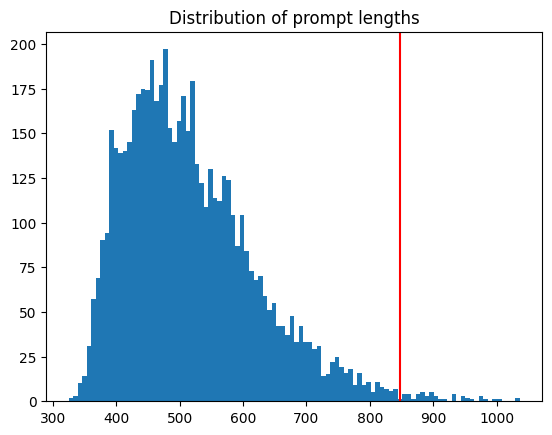

In [45]:
plt.hist([x for x in lens if x > 100], bins=100)
plt.title("Distribution of prompt lengths")
plt.axvline(cutoff, color="red")
plt.show()

### Short prompt

In [7]:
cutoff = 640
lens = [len(x["prompt"]["input_ids"]) for x in data["train"]]
examples_cut_rate = sum(x > cutoff for x in lens) / len(lens)
tokens_cut_rate = sum(x - cutoff for x in lens if x > cutoff) / sum(lens)
print(f'Cutoff: {cutoff}\nSamples: {100 * examples_cut_rate:.4f}%\nTokens: {100 * tokens_cut_rate:.4f}%')

Cutoff: 640
Samples: 1.7342%
Tokens: 0.3314%


In [8]:
cutoff = 672
lens = [len(x["prompt"]["input_ids"]) for x in data["train"]]
examples_cut_rate = sum(x > cutoff for x in lens) / len(lens)
tokens_cut_rate = sum(x - cutoff for x in lens if x > cutoff) / sum(lens)
print(f'Cutoff: {cutoff}\nSamples: {100 * examples_cut_rate:.4f}%\nTokens: {100 * tokens_cut_rate:.4f}%')

Cutoff: 672
Samples: 1.0989%
Tokens: 0.2058%


In [11]:
cutoff = 688
lens = [len(x["prompt"]["input_ids"]) for x in data["train"]]
examples_cut_rate = sum(x > cutoff for x in lens) / len(lens)
tokens_cut_rate = sum(x - cutoff for x in lens if x > cutoff) / sum(lens)
print(f'Cutoff: {cutoff}\nSamples: {100 * examples_cut_rate:.4f}%\nTokens: {100 * tokens_cut_rate:.4f}%')

Cutoff: 688
Samples: 0.8585%
Tokens: 0.1624%


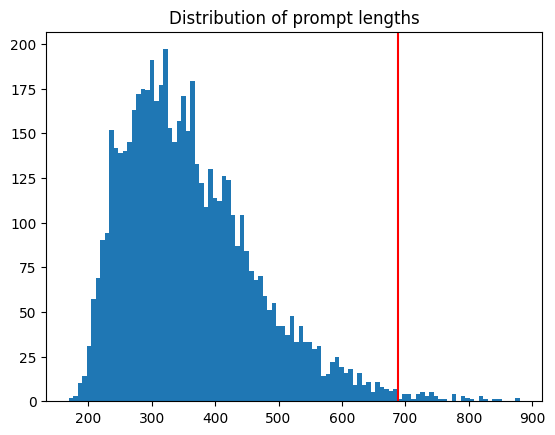

In [12]:
plt.hist([x for x in lens if x > 100], bins=100)
plt.title("Distribution of prompt lengths")
plt.axvline(cutoff, color="red")
plt.show()